In [1]:
import statsmodels
import pandas as pd

In [2]:
from statsmodels.datasets import co2,sunspots

In [3]:
x = co2.load(as_pandas=True)
co=x.data
co

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3


<AxesSubplot:>

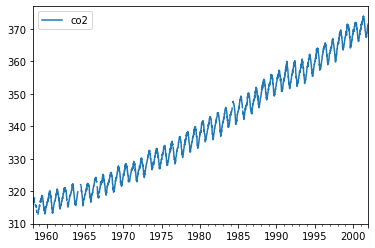

In [4]:
co.plot()

## non-stationary

In [5]:
from statsmodels.tsa.statespace.tools import diff

In [6]:
diff(co,k_diff=2)

,co2
1958-04-12,-0.9
1958-04-19,-0.4
1958-04-26,-1.0
1958-05-03,1.6
1958-05-10,NaN
...,...
2001-12-01,-0.6
2001-12-08,0.5
2001-12-15,-0.1
2001-12-22,-0.3


In [7]:
sun= sunspots.load(as_pandas= True).data
sun

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0
...,...,...
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5


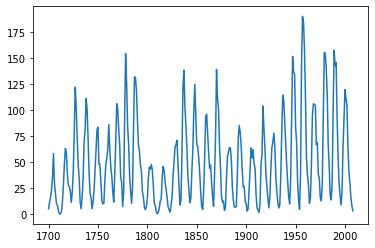

In [8]:
import matplotlib.pyplot as plt
plt.plot(sun['YEAR'],sun['SUNACTIVITY'])

In [9]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_ols,pacf_yw

In [10]:
import warnings
warnings.filterwarnings('ignore')
print (acf(sun['SUNACTIVITY']))
print (pacf_yw(sun['SUNACTIVITY'],nlags=4, method='unbiased'))
print(pacf_ols(sun['SUNACTIVITY'],nlags=4))

[ 1.          0.82020129  0.45126849  0.03957655 -0.27579196 -0.42523943
 -0.37659509 -0.15737391  0.15820254  0.47309753  0.65898002  0.65029082
  0.45666254  0.16179329 -0.12205105 -0.3161808  -0.37471125 -0.30605753
 -0.1348069   0.09158727  0.2975632   0.4207074   0.41183954  0.27020758
  0.04496208 -0.17428715 -0.33045026 -0.37287834 -0.28555061 -0.11794414
  0.08293231  0.24897507  0.32752101  0.28335919  0.1375272  -0.05526386
 -0.22973205 -0.31338879 -0.29355684 -0.17897285 -0.01769038]
[ 1.          0.82286429 -0.69031022 -0.14057213  0.0560804 ]
[ 1.          0.82378725 -0.69028693 -0.13025039  0.05492352]


In [11]:
from pandas.plotting import lag_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

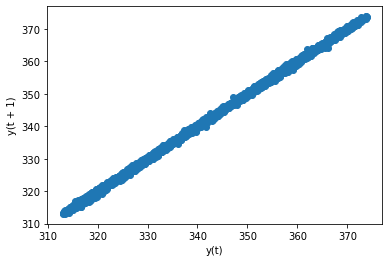

In [12]:
lag_plot(co)

In [13]:
## non-stationary (we can see autocorrelation)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

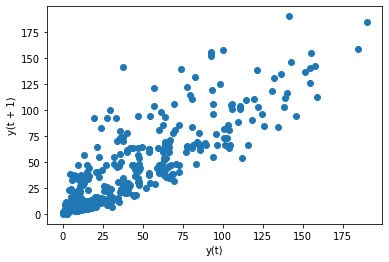

In [14]:
lag_plot(sun['SUNACTIVITY'])

In [15]:
# still non-stationary

In [16]:
birth=pd.read_csv('Data\DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

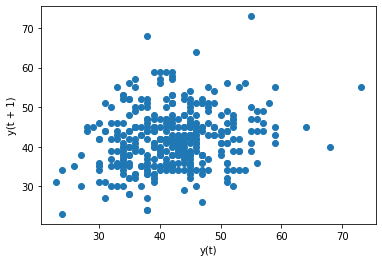

In [17]:
lag_plot(birth['Births'])

In [18]:
###   stationary  (there is not any autocorrelation, trend or seasonality)

In [19]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

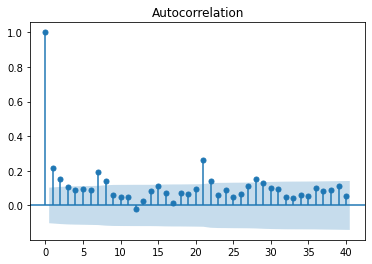

In [20]:
plot_acf(birth,lags=40);

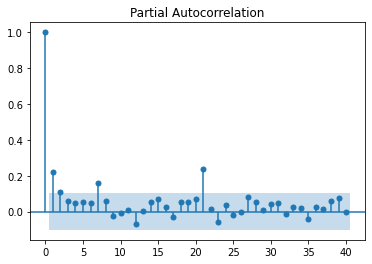

In [21]:
plot_pacf(birth,lags=40);

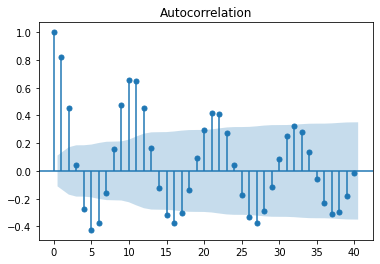

In [22]:
plot_acf(sun['SUNACTIVITY'],lags=40);

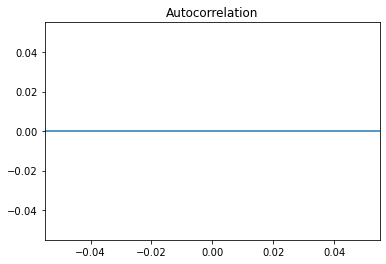

In [23]:
plot_acf(co['co2'],lags=40);

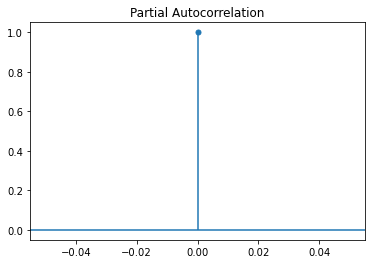

In [24]:
plot_pacf(co['co2'],lags=40);

In [25]:
# $$$$ we use these plots to choose the orders of arima and arma models $$$$

# AR MODEL

In [26]:
# linear combination of past values

In [27]:
from statsmodels.tsa.ar_model import AutoReg,AR,ARResults

In [28]:
birth = birth.dropna()

In [29]:
len(birth)

365

In [30]:
365 - 24

341

In [31]:
train = birth.iloc[:341]
test = birth .iloc[341:]

In [32]:
model = AutoReg(train['Births'],7)

In [33]:
autoreg = model.fit()

In [34]:
autoreg.params

intercept    19.646329
Births.L1     0.165683
Births.L2     0.071856
Births.L3     0.061580
Births.L4     0.031132
Births.L5     0.029732
Births.L6     0.017588
Births.L7     0.154786
dtype: float64

In [35]:
print(autoreg.aic,autoreg.bic)

3.945622058442053 4.048317474420467


In [36]:
### evaluation the model
start = len(train)+1
end = len(train) + len (test)
pred = autoreg.predict(start,end)

In [37]:
import sklearn
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error (test['Births'],pred)
mean_birth = test ['Births'].mean()
print ('error:% 2f' %error)
print('mean_birth: %2f' % mean_birth)

error: 5.439589
mean_birth: 43.625000


<AxesSubplot:xlabel='Date'>

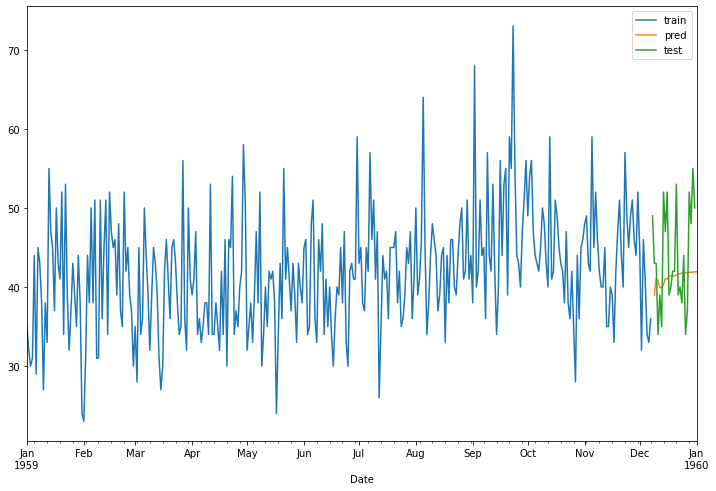

In [38]:
train['Births'].plot(legend = True,label = 'train',figsize = (12,8))
pred.plot(legend = True,label ='pred')
test['Births'].plot(legend = True,label='test')

## prediction for future 

In [39]:
# re_fit to entire data
autoreg = AutoReg(birth['Births'],7).fit()

<AxesSubplot:xlabel='Date'>

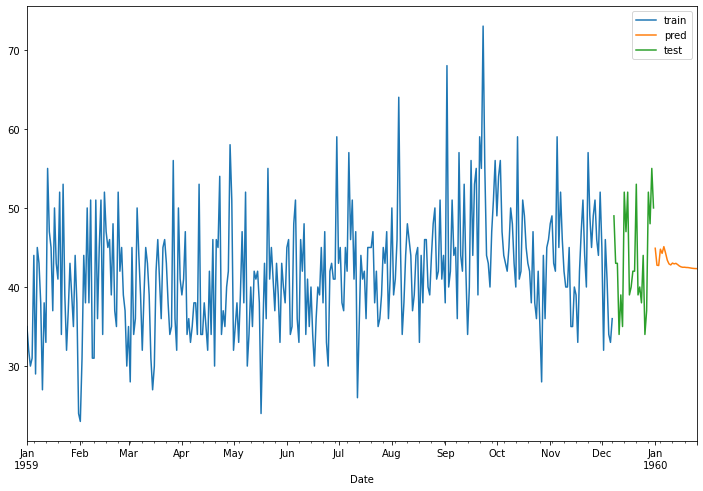

In [40]:
start = len(birth)
end = len(birth) + 24
pred = autoreg.predict(start,end)
train['Births'].plot(legend = True,label = 'train',figsize = (12,8))
pred.plot(legend = True,label ='pred')
test['Births'].plot(legend = True,label='test')

### adfuller test

In [41]:
# if p< 0.05 then data is stationary
from statsmodels.tsa.stattools import adfuller

In [42]:
dftest = adfuller (birth['Births'])
dftest

(-4.808291253559762,
 5.243412990149882e-05,
 6,
 358,
 {'1%': -3.448748905151901,
  '5%': -2.8696473721448728,
  '10%': -2.5710891239349585},
 2343.8290926464197)

In [43]:
# function to show the results properly
dfout = pd.Series(dftest[0:4],index =['ADF test statistic','p_value','# lag used','# observation'] )
for key,val in dftest[4].items():
    dfout[f'critical value ({key})']=val

In [44]:
dfout

ADF test statistic       -4.808291
p_value                   0.000052
# lag used                6.000000
# observation           358.000000
critical value (1%)      -3.448749
critical value (5%)      -2.869647
critical value (10%)     -2.571089
dtype: float64

### p_value is less than 0.05, so reject the null-hypothesis and data is stationary

### causality

In [45]:
# Four tests for granger non causality of 2 time series
from statsmodels.tsa.stattools import grangercausalitytests

In [46]:
sample = pd.read_csv('Data/samples.csv',index_col = 0,parse_dates=True)
sample.index.freq ='MS'

In [47]:
# we know beforehand that if we shift 'd' 2 times, it will be proportionate with a

In [48]:
grangercausalitytests(sample[['a','d']],maxlag =3);
# we choose the one that p is smaller. if p is more than 0.05, there is not casuality


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.7492  , p=0.1860  , df=1
likelihood ratio test: chi2=1.7365  , p=0.1876  , df=1
parameter F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=597.3806, p=0.0000  , df=2
likelihood ratio test: chi2=212.6514, p=0.0000  , df=2
parameter F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=602.2669, p=0.0000  , df=3
likelihood ratio test: chi2=212.4789, p=0.0000  , df=3
parameter F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3


In [49]:
grangercausalitytests(sample[['a','b']],maxlag =5);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8657  , p=0.1746  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.9140  , p=0.1665  , df=1
likelihood ratio test: chi2=1.8988  , p=0.1682  , df=1
parameter F test:         F=1.8657  , p=0.1746  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.9723  , p=0.1439  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=4.1192  , p=0.1275  , df=2
likelihood ratio test: chi2=4.0489  , p=0.1321  , df=2
parameter F test:         F=1.9723  , p=0.1439  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.1777  , p=0.3216  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=3.7580  , p=0.2888  , df=3
likelihood ratio test: chi2=3.6989  , p=0.2959  , df=3
parameter F test:         F=1.1777  , p=0.3216  , df_denom=110, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.1769  , p=0.3252  

In [50]:
import numpy as np
df=pd.DataFrame(np.random.randint(20,30,(50,2)),columns=['test','pred'])

In [51]:
airline = pd.read_csv('Data/airline_passengers.csv',index_col = 'Month',parse_dates=True)
airline.index.freq ='MS'

In [52]:
from statsmodels.graphics.tsaplots import month_plot,quarter_plot

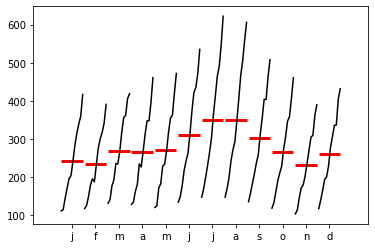

In [53]:
month_plot(airline);

In [54]:
quarter_df = airline.resample(rule='Q').mean()

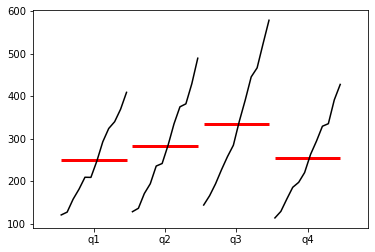

In [55]:
quarter_plot(quarter_df);

## ARIMA

In [56]:
# warning
# ARIMA model is especially usefull for time series that are directly depend on time (not other features)

#### PMDARIMA

In [57]:
#pip install pmdarima
from pmdarima import auto_arima

In [58]:
stepwise_fit=auto_arima (birth,start_p=0,max_p=6,max_q=3,seasonal=False,trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2460.722, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2650.760, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2565.234, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2463.584, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2648.768, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2461.423, Time=0.37 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2460.154, Time=0.29 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2461.271, Time=0.40 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2536.154, Time=0.18 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2462.652, Time=0.97 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2459.074, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2462.221, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2563.261, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : 

In [59]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1226.537
Date:                Tue, 05 Apr 2022   AIC                           2459.074
Time:                        11:09:31   BIC                           2470.766
Sample:                             0   HQIC                          2463.721
                                - 365                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1252      0.060      2.097      0.036       0.008       0.242
ma.L1         -0.9624      0.017    -56.429      0.000      -0.996      -0.929
sigma2        49.1512      3.250     15.122      0.000      42.781      55.522
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                25.33
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.57
Prob(H) (two-sided):                  0.81   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
stepwise_fit=auto_arima (airline['Thousands of Passengers'],start_p=0,max_p=4,start_q=0,max_q=3,seasonal=True,trace=True,m=12)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1032.128, Time=0.34 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.21 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.34 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.66 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.44 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.21 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.53 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.66 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.36 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.14 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=2.34 sec
 ARIMA(0,1,1)(1,1,1)[12]     

In [61]:
from statsmodels.tsa.arima_model import ARMA,ARIMA,ARMAResults,ARIMAResults

In [62]:
model= ARIMA(train,order=(1,1,1))

In [63]:
result=model.fit()

In [64]:
start = len(train)
end = len(train) + len (test)
arima_pred=result.predict(start,end,typ='levels')

In [65]:
# arima_pred

In [66]:
test.mean()

Births    43.625
dtype: float64

<AxesSubplot:xlabel='Date'>

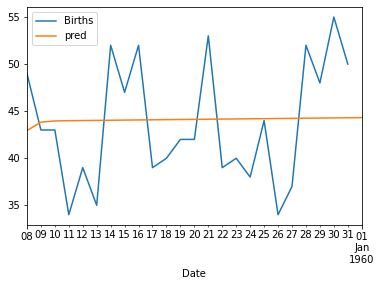

In [67]:
test.plot(legend=True,label='test')
arima_pred.plot(legend = True,label = 'pred')

In [68]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

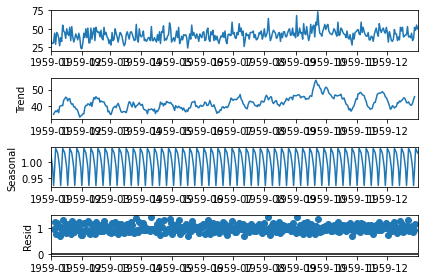

In [69]:
seasonal_decompose(birth,model='multiplicative').plot();

## SARIMAX

In [70]:
df=pd.read_csv('Data/RestaurantVisitors.csv',index_col='date',parse_dates=True)
df1= df.dropna()
df1.head(5)

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [71]:
col =['rest1','rest2','rest3','rest4','total']
for cols in col:
    df1[cols]=df1[cols].astype(int)

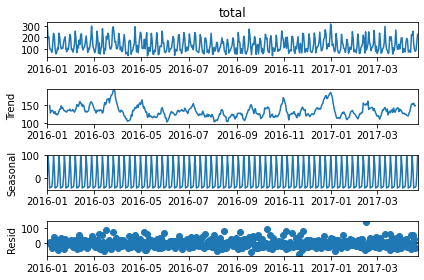

In [72]:
seasonal_decompose(df1['total']).plot();

In [73]:
## it has weekly seasonality

In [74]:
auto_arima(df1['total'],seasonal=True,m=7)

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True)

In [75]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [76]:
model=SARIMAX(df1['total'].iloc[:436],order=(0,0,0),seasonal_order=(1,0,1,7))

In [77]:
res=model.fit()

In [78]:
pred=res.predict(436,477)

<AxesSubplot:xlabel='date'>

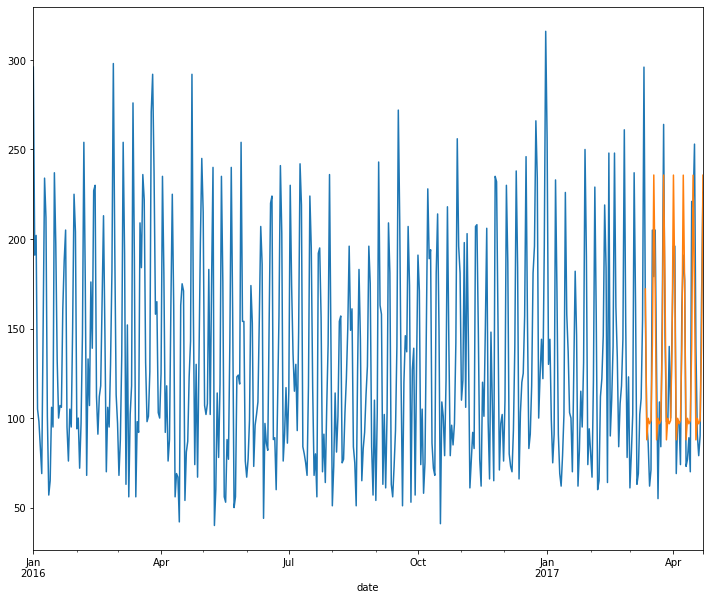

In [79]:
df1['total'].plot(figsize=(12,10))
pred.plot()

In [80]:
from statsmodels.tools.eval_measures import rmse

In [81]:
rmse(pred,df1['total'].iloc[436:])

31.91404893766746

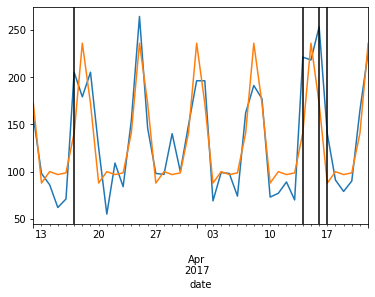

In [82]:
ax=df1['total'].iloc[436:].plot()
pred.plot()
for day in df1.iloc[436:].query('holiday==1').index:
    ax.axvline(x=day,color='black')
    

In [83]:
auto_arima(df1['total'],exogenous=df1[['holiday']],seasonal=True,m=7)

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True)

In [84]:
model=SARIMAX(df1['total'],exog=df1[['holiday']],order=(1,0,0),seasonal_order=(1,0,1,7))

In [85]:
result=model.fit()

In [86]:
pred=result.predict(436,477,exog=df1[['holiday']])

In [87]:
rmse(pred,df1['total'].iloc[436:])

23.97038383919098

## VAR

In [88]:
from statsmodels.tsa.api import VAR,adfuller

In [89]:
df=pd.read_csv('Data/M2SLMoneyStock.csv',index_col='Date',parse_dates=True)
sp=pd.read_csv('Data/PCEPersonalSpending.csv',index_col='Date',parse_dates=True)

In [90]:
df=df.join(sp)


In [91]:
df=df.dropna()

In [92]:
adfuller(df['Money'])
# non_stationary

(4.239022425670653,
 1.0,
 4,
 247,
 {'1%': -3.457105309726321,
  '5%': -2.873313676101283,
  '10%': -2.5730443824681606},
 2219.917877142354)

In [93]:
adfuller(df['Spending'])
# non_stationary

(0.14979608598625846,
 0.9693009944428315,
 3,
 248,
 {'1%': -3.4569962781990573,
  '5%': -2.8732659015936024,
  '10%': -2.573018897632674},
 2339.735574840993)

In [94]:
df_trans=df.diff()
# df_trans

In [95]:
df_trans = df_trans.dropna()

In [96]:
adfuller(df_trans['Money'])
#non_stationary

(-2.057404049737941,
 0.26198379785112386,
 15,
 235,
 {'1%': -3.4584868856997004,
  '5%': -2.873918902362675,
  '10%': -2.573367247623359},
 2222.9483460694405)

In [97]:
adfuller(df_trans['Spending'])
# stationary

(-7.226973930850655,
 2.0410272592128896e-10,
 2,
 248,
 {'1%': -3.4569962781990573,
  '5%': -2.8732659015936024,
  '10%': -2.573018897632674},
 2328.23145843905)

In [98]:
df_trans=df_trans.diff().dropna()

In [99]:
adfuller(df_trans['Money'])
# stationary

(-7.077470794343021,
 4.760674931295975e-10,
 14,
 235,
 {'1%': -3.4584868856997004,
  '5%': -2.873918902362675,
  '10%': -2.573367247623359},
 2217.097202826827)

In [100]:
n_obs=12
train=df_trans[:-n_obs]
test=df_trans[-n_obs:]

In [101]:
model=VAR(train)
for p in [1,2,3,4,5,6]:
    results=model.fit(p)
    print(f'order{p}')
    print(f'AIC:{results.aic}')
    print('\n')

order1
AIC:14.178610495220898


order2
AIC:13.955189367163705


order3
AIC:13.849518291541038


order4
AIC:13.827950574458281


order5
AIC:13.78730034460964


order6
AIC:13.799076756885809




In [102]:
result=model.fit(5)

In [103]:
lagged_value = train.values[-5:]

In [104]:
z=result.forecast(y=lagged_value,steps=12)

In [105]:
idx = pd.date_range('2015-01-01',periods=12,freq='MS')

In [106]:
df_pred=pd.DataFrame(z,index=idx,columns=['money2diff','spend2diff'])

In [107]:
df_pred['money1diff']=(df['Money'].iloc[-n_obs-1]-df['Money'].iloc[-n_obs-2]) + df_pred['money2diff'].cumsum()

In [108]:
df_pred['money_pred'] = df['Money'].iloc[-n_obs-1] + df_pred['money1diff'].cumsum()

In [109]:
df_pred['spend1diff']=(df['Spending'].iloc[-n_obs-1]-df['Spending'].iloc[-n_obs-2]) + df_pred['spend2diff'].cumsum()

In [110]:
df_pred['spend_pred'] = df['Spending'].iloc[-n_obs-1] + df_pred['spend1diff'].cumsum()

<AxesSubplot:xlabel='Date'>

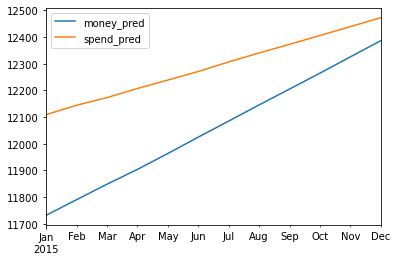

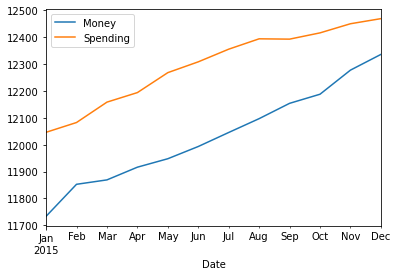

In [111]:
df_pred[['money_pred','spend_pred']].plot()
df[['Money','Spending']].iloc[-n_obs:].plot()

<AxesSubplot:xlabel='Date'>

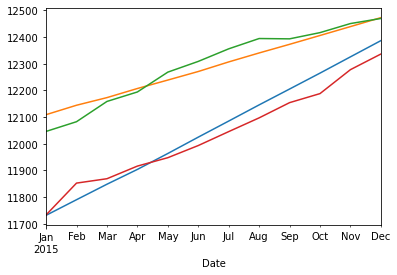

In [112]:
df_pred['money_pred'].plot()
df_pred['spend_pred'].plot()
df['Spending'].iloc[-n_obs:].plot()
df['Money'].iloc[-n_obs:].plot()

In [113]:
rmse(df_pred['money_pred'],df['Money'].iloc[-n_obs:])

43.71049653558893

In [114]:
np.mean(df['Money'].iloc[-n_obs:])

12034.008333333333

In [115]:
rmse(df_pred['spend_pred'],df['Spending'].iloc[-n_obs:])

37.00117516940808

In [116]:
np.mean(df['Spending'].iloc[-n_obs:])

12294.533333333333

## VARMA

In [117]:
from statsmodels.tsa.api import VARMAX

In [118]:
auto_arima(df['Money'],maxiter=1000)

ARIMA(maxiter=1000, order=(1, 2, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [119]:
auto_arima(df['Spending'],maxiter=1000)

ARIMA(maxiter=1000, order=(1, 1, 2), scoring_args={}, suppress_warnings=True)

In [139]:
# we use p and q (first and last numbers), second number show the order of diff
model = VARMAX(train,order=(1,2),trend='c')

In [140]:
result = model.fit(maxiter=1000,disp=False)

In [141]:
# result.summary()

Dep. Variable:,"['Money', 'Spending']",No. Observations:,238
Model:,"VARMA(1,2)",Log Likelihood,-2286.605
,+ intercept,AIC,4607.209
Date:,"Tue, 05 Apr 2022",BIC,4666.238
Time:,11:40:41,HQIC,4630.999
Sample:,03-01-1995,,
,- 12-01-2014,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"0.78, 0.00",Jarque-Bera (JB):,"532.50, 124.30"
Prob(Q):,"0.38, 0.95",Prob(JB):,"0.00, 0.00"
Heteroskedasticity (H):,"5.61, 2.90",Skew:,"1.30, -0.34"


In [163]:
h = result.forecast(12)

In [164]:
df_forecast=pd.DataFrame(data=h,index=idx)
df_forecast.columns =['money2diff','spend2diff']

In [166]:
df_forecast['money1diff']=(df['Money'].iloc[-n_obs-1]-df['Money'].iloc[-n_obs-2]) + df_forecast['money2diff'].cumsum()

In [167]:
df_forecast['money_pred'] = df['Money'].iloc[-n_obs-1] + df_forecast['money1diff'].cumsum()

In [168]:
df_forecast['spend1diff']=(df['Spending'].iloc[-n_obs-1]-df['Spending'].iloc[-n_obs-2]) + df_forecast['spend2diff'].cumsum()

In [169]:
df_forecast['spend_pred'] = df['Spending'].iloc[-n_obs-1] + df_forecast['spend1diff'].cumsum()

In [170]:
df_forecast

,money2diff,spend2diff,money1diff,money_pred,spend1diff,spend_pred
2015-01-01,-11.540332,36.178813,67.059668,11737.159668,46.778813,12108.778813
2015-02-01,-10.893153,-4.247293,56.166515,11793.326183,42.531520,12151.310333
2015-03-01,0.834734,-0.267367,57.001249,11850.327432,42.264153,12193.574486
2015-04-01,-1.196038,-0.262707,55.805211,11906.132644,42.001446,12235.575932
2015-05-01,0.749203,0.144523,56.554414,11962.687058,42.145969,12277.721901
2015-06-01,-0.168505,-0.003436,56.385909,12019.072967,42.142533,12319.864434
2015-07-01,0.365874,0.092338,56.751783,12075.824750,42.234870,12362.099305
2015-08-01,0.076797,0.042225,56.828580,12132.653330,42.277096,12404.376400
2015-09-01,0.237073,0.070332,57.065653,12189.718983,42.347428,12446.723828
2015-10-01,0.148950,0.054938,57.214603,12246.933586,42.402366,12489.126193


<AxesSubplot:xlabel='Date'>

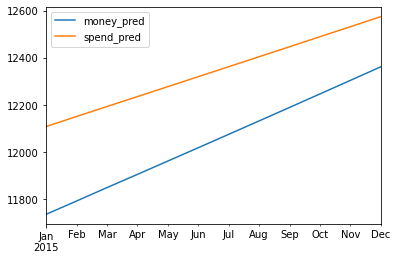

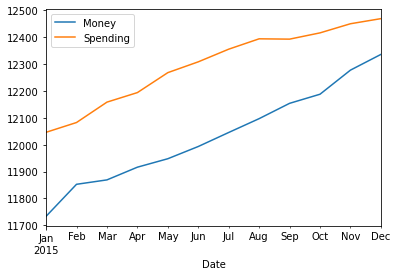

In [171]:
df_forecast[['money_pred','spend_pred']].plot()
df[['Money','Spending']].iloc[-n_obs:].plot()

<AxesSubplot:xlabel='Date'>

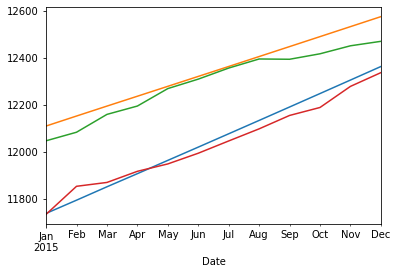

In [173]:
df_forecast['money_pred'].plot()
df_forecast['spend_pred'].plot()
df['Spending'].iloc[-n_obs:].plot()
df['Money'].iloc[-n_obs:].plot()

In [174]:
rmse(df_forecast['money_pred'],df['Money'].iloc[-n_obs:])

33.251276334825874

In [176]:
np.mean(df['Money'].iloc[-n_obs:])

12034.008333333333

In [175]:
rmse(df_forecast['spend_pred'],df['Spending'].iloc[-n_obs:])

56.249611353043235

In [177]:
np.mean(df['Spending'].iloc[-n_obs:])

12294.533333333333